# Propensity Score Matcher

In this notebook, we show the basic usage of the PropensityScoreMatcher. Unlike the GeneticMatcher and ConstraintSatisfactionMatcher, the PropensityScoreMatcher does not directly optimize a  particular balance score. Instead, the PropensityScoreMatcher uses the given objective as a measure of "correctness" of the propensity score model. The matcher tries a (possibly large) number of potential models and returns the model with the best score according to the given metric.

In [1]:
import logging 
logging.basicConfig(
    format="%(levelname)-4s [%(filename)s:%(lineno)d] %(message)s",
    level='INFO',
)

from pybalance.utils import *
from pybalance.sim import generate_toy_dataset
from pybalance.propensity import PropensityScoreMatcher, plot_propensity_score_match_distributions
from pybalance.visualization import (
    plot_numeric_features, 
    plot_categoric_features, 
    plot_binary_features,
    plot_joint_numeric_distributions,
    plot_per_feature_loss
)

In [2]:
m = generate_toy_dataset(n_pool=10000, n_target=1000, seed=123)
m

,age,height,weight,gender,haircolor,country,population,binary_0,binary_1,binary_2,binary_3,patient_id
0,60.807949,173.610298,77.912924,0.0,1,4,pool,0,0,1,1,0
1,45.810836,170.541198,112.416988,0.0,1,4,pool,0,1,0,0,1
2,58.876976,188.138610,108.789013,0.0,0,2,pool,0,0,1,1,2
3,73.398077,162.939196,65.345017,0.0,1,4,pool,0,1,1,1,3
4,56.890587,156.386701,78.140295,0.0,0,3,pool,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.662026,162.692755,54.607476,0.0,2,4,target,0,0,1,1,10995
996,49.130301,141.583192,103.798145,1.0,0,2,target,1,0,0,0,10996
997,68.035281,168.744482,56.499644,1.0,1,1,target,0,0,0,1,10997
998,62.044564,177.796983,75.983973,1.0,1,1,target,0,0,0,1,10998


## Optimize Beta (Mean Absolute SMD)


In [3]:
# Note that using a caliper can result in matched population being 
# smaller than target! If this is undesired, do not use a caliper.
objective = beta = BetaBalance(m)
matcher = PropensityScoreMatcher(
    matching_data=m,
    objective=objective,
    time_limit=900,
    max_iter=250)
matcher.get_params()

{'objective': 'beta',
 'caliper': None,
 'max_iter': 250,
 'time_limit': 900,
 'method': 'greedy'}

In [4]:
matcher.match()

INFO [matcher.py:180] Training model LogisticRegression (iter 1/250, 0.001 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: LogisticRegression
INFO [matcher.py:139] 	* C: 0.30826677643062983
INFO [matcher.py:139] 	* fit_intercept: False
INFO [matcher.py:139] 	* max_iter: 500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:139] 	* solver: saga
INFO [matcher.py:140] 	Score (beta): 0.0466
INFO [matcher.py:141] 	Solution time: 0.004 min
INFO [matcher.py:180] Training model LogisticRegression (iter 2/250, 0.004 min) ...
INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: LogisticRegression
INFO [matcher.py:139] 	* C: 0.4178302034480912
INFO [matcher.py:139] 	* fit_intercept: True
INFO [matcher.py:139] 	* max_iter: 500
INFO [matcher.py:139] 	* penalty: l2
INFO [matcher.py:139] 	* solver: saga
INFO [matcher.py:140] 	Score (beta): 0.0370
INFO [matcher.py:141] 	Solution time: 0.005 min
INFO [matcher.py:180] 

INFO [matcher.py:180] Training model LogisticRegression (iter 64/250, 0.272 min) ...
/Users/sprivite/src/pybalance/venv/pybalance/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
INFO [matcher.py:180] Training model SGDClassifier (iter 65/250, 0.294 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 66/250, 0.295 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 67/250, 0.297 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 68/250, 0.299 min) ...
/Users/sprivite/src/pybalance/venv/pybalance/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
INFO [matcher.py:180] Training model LogisticRegression (iter 69/250, 0.317 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 70/250, 0.319 min) ...
INFO

INFO [matcher.py:180] Training model LogisticRegression (iter 128/250, 0.710 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 129/250, 0.717 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 130/250, 0.719 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 131/250, 0.721 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 132/250, 0.725 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 133/250, 0.727 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 134/250, 0.728 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 135/250, 0.730 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 136/250, 0.731 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 137/250, 0.733 min) ...
/Users/sprivite/src/pybalance/venv/pybalance/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the co

INFO [matcher.py:180] Training model SGDClassifier (iter 204/250, 1.104 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 205/250, 1.105 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 206/250, 1.117 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 207/250, 1.119 min) ...
INFO [matcher.py:180] Training model SGDClassifier (iter 208/250, 1.121 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 209/250, 1.122 min) ...
/Users/sprivite/src/pybalance/venv/pybalance/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
INFO [matcher.py:180] Training model LogisticRegression (iter 210/250, 1.145 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 211/250, 1.147 min) ...
INFO [matcher.py:180] Training model LogisticRegression (iter 212/250, 1.150 min) ...
/Users/sprivite/src/pybalance/ven

,age,height,weight,gender,haircolor,country,population,binary_0,binary_1,binary_2,binary_3,patient_id
3446,37.549356,139.579121,60.890246,1.0,1,1,pool,0,0,0,1,3446
4926,27.557032,151.371970,77.182597,1.0,1,3,pool,0,1,0,0,4926
3456,60.742592,179.351062,73.254390,0.0,0,1,pool,1,0,1,1,3456
6891,53.909882,185.862281,54.818220,0.0,2,3,pool,1,0,1,0,6891
962,52.829914,137.725077,93.206007,0.0,1,2,pool,1,1,0,0,962
...,...,...,...,...,...,...,...,...,...,...,...,...
995,39.662026,162.692755,54.607476,0.0,2,4,target,0,0,1,1,10995
996,49.130301,141.583192,103.798145,1.0,0,2,target,1,0,0,0,10996
997,68.035281,168.744482,56.499644,1.0,1,1,target,0,0,0,1,10997
998,62.044564,177.796983,75.983973,1.0,1,1,target,0,0,0,1,10998


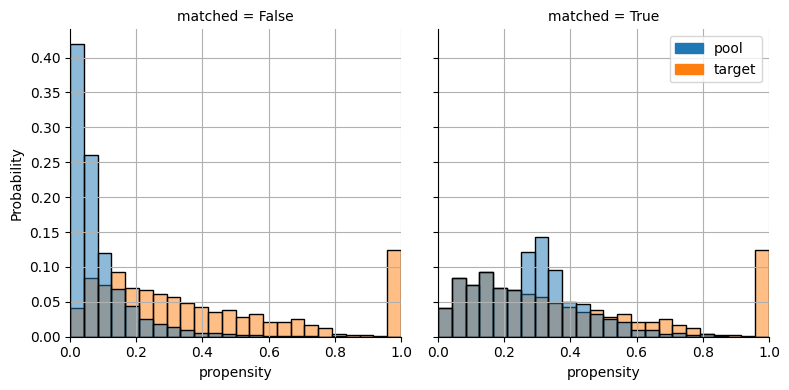

In [5]:
%matplotlib inline
plot_propensity_score_match_distributions(matcher)


INFO [matcher.py:136] Best propensity score match found:
INFO [matcher.py:137] 	Model: LogisticRegression
INFO [matcher.py:139] 	* C: 1.1176816672180467
INFO [matcher.py:139] 	* fit_intercept: False
INFO [matcher.py:139] 	* max_iter: 500
INFO [matcher.py:139] 	* penalty: l1
INFO [matcher.py:139] 	* solver: saga
INFO [matcher.py:140] 	Score (beta): 0.0295
INFO [matcher.py:141] 	Solution time: 0.364 min


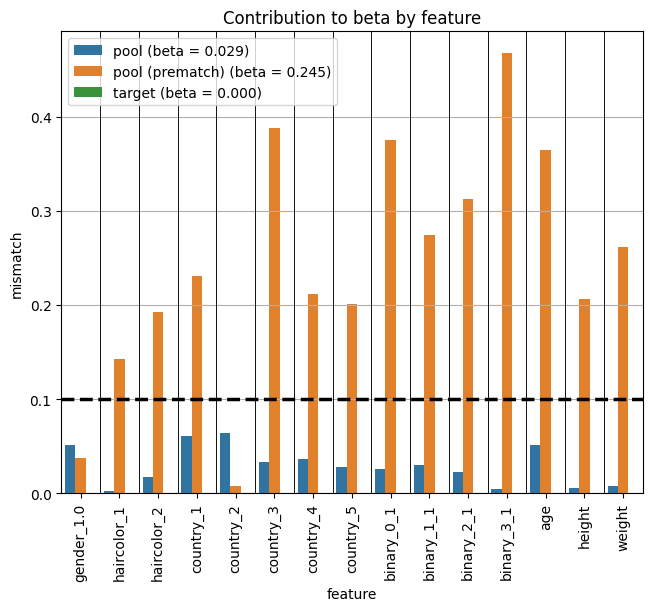

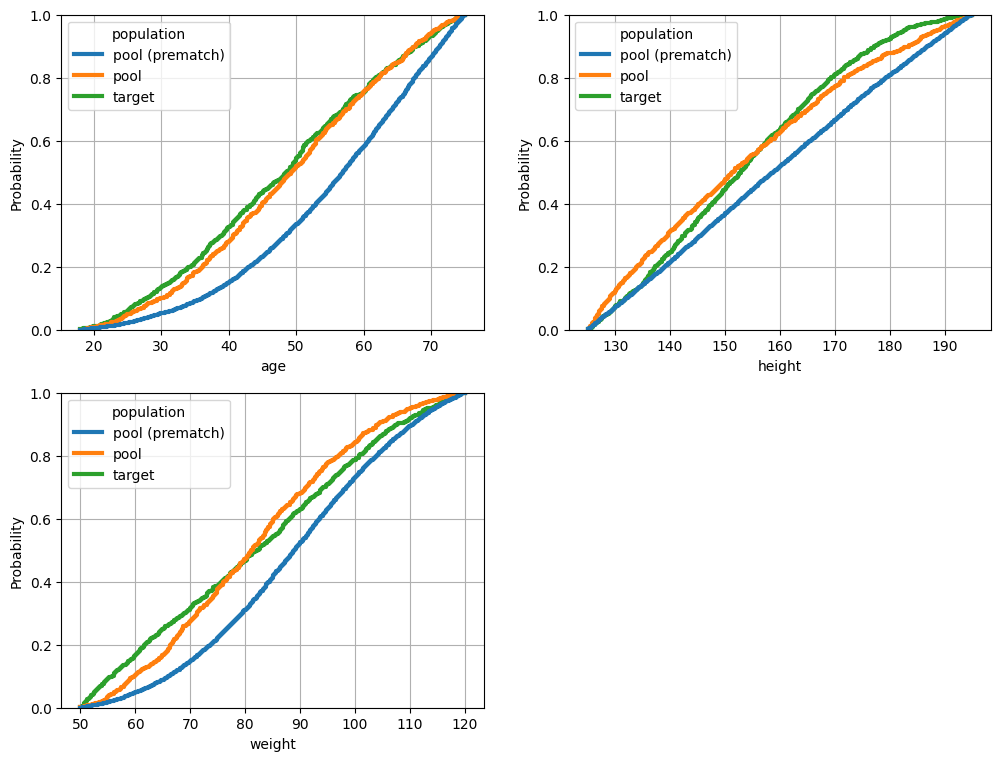

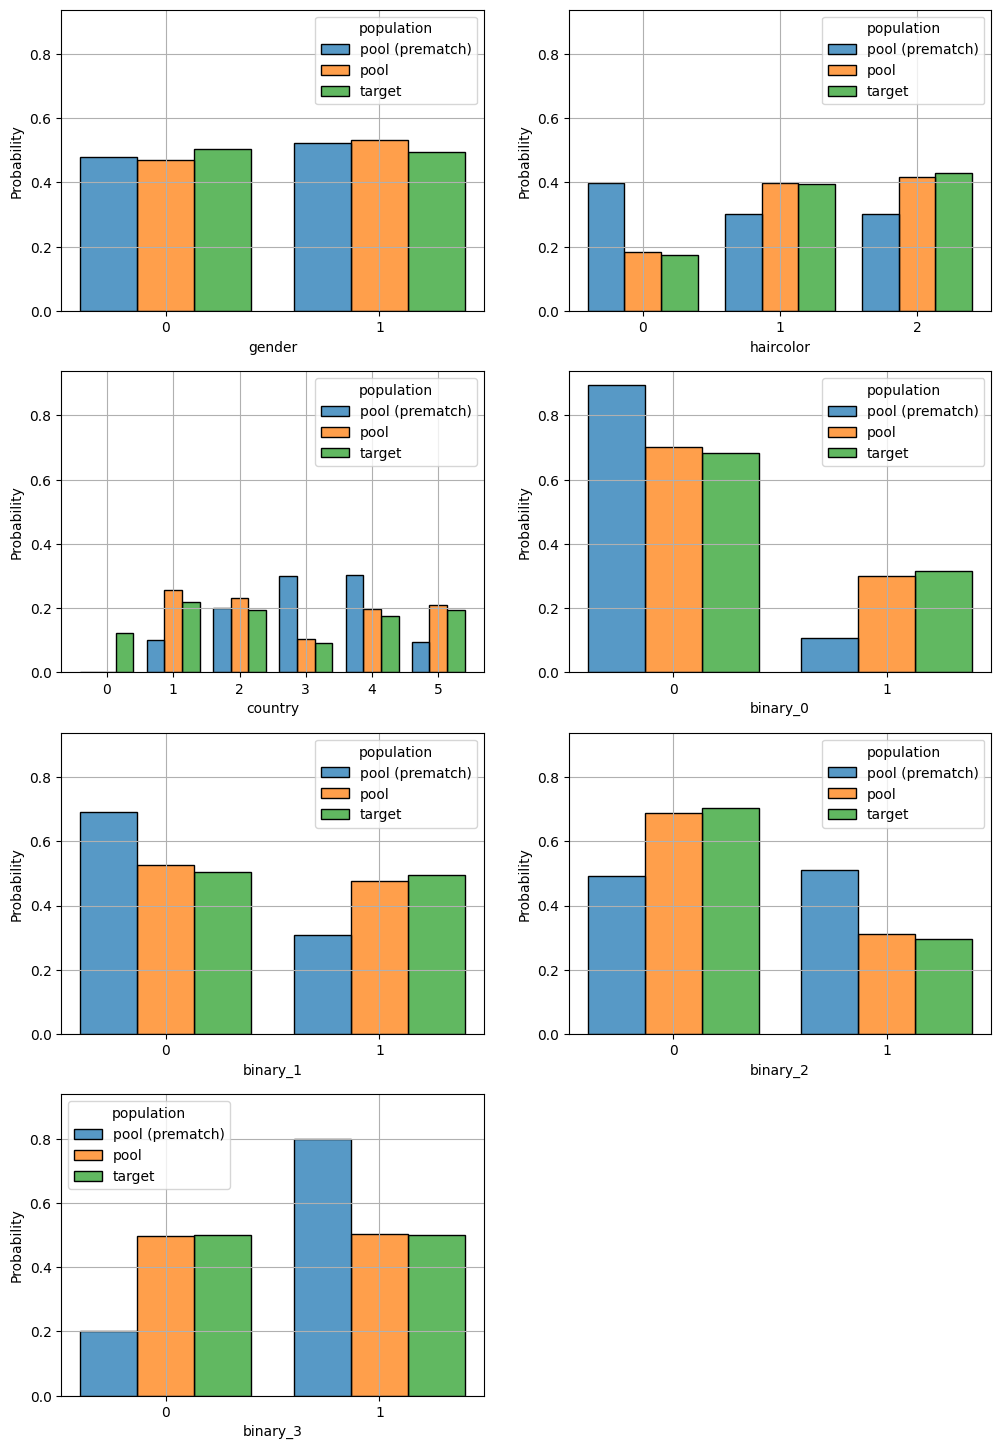

In [6]:
%matplotlib inline
objective = beta = BetaBalance(m)

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])